# Nous simulons les montants de TICPE payés par un ménage selon le type de véhicules dont il dispose. Nous prenons un ménage dont les dépenses annuelles en carburants s'élèveraient à 1000 euros. C'est en dessous de la moyenne de nos samples (plutôt autour de 1500 euros).

# Import de modules généraux

In [1]:
import datetime
import seaborn
import pandas as pd


# Import de modules et fonctions spécifiques à OpenFisca

In [2]:
from openfisca_france_indirect_taxation.examples.utils_example import graph_builder_line, save_dataframe_to_graph
from openfisca_france_indirect_taxation.scenarios import init_single_entity

In [3]:
from openfisca_france_indirect_taxation import CountryTaxBenefitSystem as TaxBenefitSystem
tax_benefit_system = TaxBenefitSystem()

# Import d'une nouvelle palette de couleurs

In [4]:
seaborn.set_palette(seaborn.color_palette("Set2", 12))
%matplotlib inline

# Définition d'un cas type et de son exposition à la TICPE entre 2000 et 2013

In [5]:
index = range(2000, 2014)
columns = ['si une essence et une diesel', 'si seulement vehicules diesel', 'si seulement vehicules essence']
depenses_ticpe_pour_1000_euros_carbu = pd.DataFrame(index = index, columns = columns)

for element in columns:
    if element == 'si seulement vehicules essence':
        diesel = 0
    else:
        diesel = 1
    if element == 'si seulement vehicules diesel':
        essence = 0
    else:
        essence = 1
    for year in range(2000, 2014):
        year = year
        simulation = init_single_entity(
            scenario = tax_benefit_system.new_scenario(),
            period = year,
            personne_de_reference = dict(
                birth = datetime.date(year - 40, 1, 1),
                ),
            menage = dict(
                depenses_carburants = 1000,
                veh_essence = essence,
                veh_diesel = diesel,
                ),
            ).new_simulation(debug = True)
        print(element, year)
        depenses_ticpe_pour_1000_euros_carbu.loc[depenses_ticpe_pour_1000_euros_carbu.index == year, element] = \
            simulation.calculate('ticpe_totale', period = year)


si une essence et une diesel 2000
taux_implicite_diesel 1.242242356789368
depenses_diesel_corrigees [592.3564]
[272.11942]
si une essence et une diesel 2001
taux_implicite_diesel 1.4066987306681504
depenses_diesel_corrigees [597.2261]
[291.86832]
si une essence et une diesel 2002
taux_implicite_diesel 1.514567082839819
depenses_diesel_corrigees [593.5677]
[298.92645]
si une essence et une diesel 2003
taux_implicite_diesel 1.4432633283906497
depenses_diesel_corrigees [594.92804]
[293.83838]
si une essence et une diesel 2004
taux_implicite_diesel 1.2914173281339743
depenses_diesel_corrigees [594.82245]
[280.2971]
si une essence et une diesel 2005
taux_implicite_diesel 0.9439993843724024
depenses_diesel_corrigees [591.07074]
[239.98488]
si une essence et une diesel 2006
taux_implicite_diesel 0.906613378789839
depenses_diesel_corrigees [600.9666]
[238.93439]
si une essence et une diesel 2007
taux_implicite_diesel 0.9249455525398551
depenses_diesel_corrigees [607.1665]
[243.93512]
si une es

# Réalisation d'un graphique

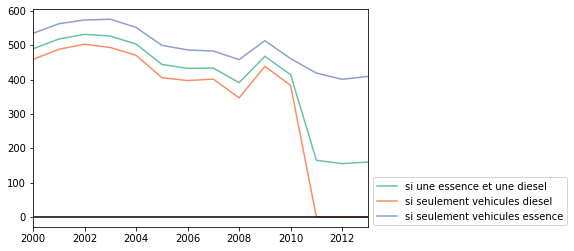

In [6]:
graph_builder_line(depenses_ticpe_pour_1000_euros_carbu)
